In [97]:
import folium
import pandas as pd
import datetime as datetime
import geopandas as gpd
import jpholiday
from geopandas.geoseries  import *
import math
import os
import matplotlib.pyplot as plt


In [98]:
df = pd.read_csv('/Users/kojimiyazawa/Desktop/projects/jn/統計学習/三菱/不動産プログラム/加工後データ(s_data8).csv',index_col = 0)

In [99]:
df2 = df.copy()
df2 = df2[df2['基準西暦_年'] > 2009]
df2['基準月'] = df2['期首'].str.replace('.*年(.*)月.*',r'\1').astype(float)

#df2 = df2[~df2.duplicated(subset=['物件名称'])]
#df2 = df2[df2['所在地（住居表示）'].str.match('東京都.*区.*')]
#df2 = df2[df2['所在地（住居表示）'].str.contains('東京都千代田区|東京都港区|東京都中央区|東京都新宿区|東京都渋谷区')]
#df2 = df2[df2['用途分類']=='事務所']
#df2 = df2[df2['建物用途'].str.match('事務所',na=True)]

a = 1/12
#df2['daten'] = df2['基準西暦_年'] + ((df2['基準月']-1) * a).round(2)
df2['daten'] = df2['基準西暦_年']
df2.loc[df2['基準月'] > 6, 'daten'] = df2['daten'] + 0.5

df2 = df2.sort_values(by = ['物件名称'])
df2

,物件名称,保有投資法人,決算期,期首,期末,所有形態,取得年月日,所在地（住居表示）,用途地域,建物用途,...,修繕費（物件平均）,期末稼働率(前年との平均)（物件平均）,修繕費比,稼働率差,補正賃料,補正賃料_前年,補正賃料_後年,補正賃料（対数）,基準月,daten
1791,35山京ビル,日本リテールファンド投資法人,17,平成22年3月1日,平成22年8月31日,信託受益権,平成22年3月1日,東京都中央区入船3-7-2,商業,事務所・共同住宅・駐車場,...,1.375000e+06,98.018750,1.454545,-13.868750,150.888644,150.888644,-1.000000,5.016542,3.0,2010.0
5825,36山京ビル,Oneリート投資法人,9,平成29年9月1日,平成30年2月28日,信託受益権,平成25年10月10日,東京都新宿区新小川町8-30,準工業,事務所・駐車場,...,1.768125e+06,99.181250,1.165076,0.818750,113.947300,113.947300,113.947300,4.735736,9.0,2017.5
5824,36山京ビル,Oneリート投資法人,8,平成29年3月1日,平成29年8月31日,信託受益権,平成25年10月10日,東京都新宿区新小川町8-30,準工業,事務所・駐車場,...,1.768125e+06,99.181250,1.761753,0.818750,112.095301,112.095301,112.095301,4.719349,3.0,2017.0
5011,36山京ビル,Oneリート投資法人,7,平成28年9月1日,平成29年2月28日,信託受益権,平成25年10月10日,東京都新宿区新小川町8-30,準工業,事務所・駐車場,...,1.768125e+06,99.181250,1.558713,0.818750,113.499278,113.499278,113.499278,4.731796,9.0,2016.5
3629,36山京ビル,Oneリート投資法人,2,平成26年3月1日,平成26年8月31日,信託受益権,平成25年10月10日,東京都新宿区新小川町8-30,準工業,事務所・駐車場,...,1.768125e+06,99.181250,0.765217,-5.731250,106.493194,-1.000000,106.493194,4.668081,3.0,2014.0
4279,36山京ビル,Oneリート投資法人,5,平成27年9月1日,平成28年2月29日,信託受益権,平成25年10月10日,東京都新宿区新小川町8-30,準工業,事務所・駐車場,...,1.768125e+06,99.181250,0.382891,0.818750,112.036174,112.036174,112.036174,4.718822,9.0,2015.5
4278,36山京ビル,Oneリート投資法人,4,平成27年3月1日,平成27年8月31日,信託受益権,平成25年10月10日,東京都新宿区新小川町8-30,準工業,事務所・駐車場,...,1.768125e+06,99.181250,0.448498,0.818750,110.440424,110.440424,110.440424,4.704476,3.0,2015.0
3630,36山京ビル,Oneリート投資法人,3,平成26年9月1日,平成27年2月28日,信託受益権,平成25年10月10日,東京都新宿区新小川町8-30,準工業,事務所・駐車場,...,1.768125e+06,99.181250,0.520891,0.818750,109.223788,109.223788,109.223788,4.693399,9.0,2014.5
5010,36山京ビル,Oneリート投資法人,6,平成28年3月1日,平成28年8月31日,信託受益権,平成25年10月10日,東京都新宿区新小川町8-30,準工業,事務所・駐車場,...,1.768125e+06,99.181250,1.396960,0.818750,110.666620,110.666620,110.666620,4.706522,3.0,2016.0
5826,A-FLAG骨董通り,アクティビア・プロパティーズ投資法人,12,平成29年6月1日,平成29年11月30日,信託受益権,平成28年12月20日,東京都港区南青山5-4-40,商業・第二種中高層住居専用,店舗・事務所・車庫,...,7.067500e+06,100.000000,0.492253,0.000000,206.627656,206.627656,206.627656,5.330918,6.0,2017.0


In [100]:
df3 = df2.loc[:,['補正賃料（対数）','緯度','経度','築年数','地価（4地点加重平均）(t-1)（対数）','基準階坪数_最終（対数）',
               '指定容積率','賃貸可能面積率','徒歩時間（秒）','階数','土地（地積・全体敷地）（対数）','daten','コンビニフラグ','カフェフラグ',
                'zigata','最大路線価','建物（全体面積・延床面積）（対数）']]

df3 = df3.rename(columns={'緯度': 'ido', '経度':'keido', '補正賃料（対数）':'tinryo', '地価（4地点加重平均）(t-1)（対数）':'tika', 
                         '築年数':'tikunen','基準階坪数_最終（対数）':'kizyunkai','徒歩時間（秒）':'toho', '階数':'floor',
                          '指定容積率':'youseki','賃貸可能面積率':'kasikano','土地（地積・全体敷地）（対数）':'tochi','最大路線価':'rosenka',
                          'コンビニフラグ':'conv','カフェフラグ':'cafe','建物（全体面積・延床面積）（対数）':'tatemono'
                         })
#df3 = df3.loc[:,['物件名称','ido','keido','tinryo','tika','toho','tikunen','floor']]
#df3['toho'] = df3['toho'] + 0.01
df3['ido'] = df3['ido']*100
df3['keido'] = df3['keido'] *100
#df3['daten'] = df3['daten'] * 100 
#df3['tika2'] = df3['tika'] *10
df3 = df3.dropna()
df3 = df3.sort_values('daten')

df4 = df2.dropna(subset=['補正賃料（対数）','緯度','経度','築年数','地価（4地点加重平均）(t-1)（対数）','基準階坪数_最終（対数）',
               '指定容積率','賃貸可能面積率','徒歩時間（秒）','階数','土地（地積・全体敷地）（対数）','daten','コンビニフラグ','カフェフラグ',
                'zigata','最大路線価','建物（全体面積・延床面積）（対数）'])
df4 = df4.sort_values('daten')
df3.to_csv('gwr2.csv')
df4.to_csv('temp.csv')
df3

,tinryo,ido,keido,tikunen,tika,kizyunkai,youseki,kasikano,toho,floor,tochi,daten,conv,cafe,zigata,rosenka,tatemono
1791,5.016542,13977.743519,3567.085823,19.0,14.420011,5.055417,500,0.818325,366.0,9.0,7.104136,2010.0,0.0,0.0,0,13.496682,8.766176
1877,5.101362,13975.391001,3565.378724,19.0,14.616918,4.122122,700,0.834105,341.0,10.0,5.685279,2010.0,0.0,0.0,1,14.812459,7.689261
2045,5.136211,13974.212380,3568.317818,19.0,14.815420,4.456902,600,0.829047,244.0,8.0,6.199271,2010.0,0.0,0.0,1,14.166167,7.827779
1990,5.563420,13975.174619,3565.730903,19.0,14.706346,5.007631,600,0.641592,216.0,9.0,6.597309,2010.0,0.0,0.0,1,14.334304,8.584992
1828,5.637608,13971.857927,3566.788487,20.0,15.288835,5.305938,400,0.620078,269.0,5.0,6.870178,2010.0,0.0,0.0,1,14.234221,8.384656
2206,4.954662,13978.503792,3569.063690,20.0,14.139739,5.129840,700,0.675671,210.0,9.0,6.822807,2010.0,0.0,0.0,1,13.910821,8.816026
2150,5.353021,13973.756309,3568.323917,26.0,14.921916,5.029653,700,0.644157,145.0,4.0,6.488901,2010.0,0.0,0.0,1,14.214287,8.547330
1875,5.035760,13971.570496,3572.772812,17.0,14.153825,3.752558,800,0.881307,306.0,9.0,5.238090,2010.0,1.0,1.0,1,14.334304,7.227416
1992,5.701028,13975.206514,3566.990488,47.0,15.904538,5.844935,800,0.556727,190.0,9.0,7.498011,2010.0,0.0,0.0,1,15.771371,9.802698
2099,5.449081,13975.261808,3566.445827,28.0,15.057528,5.279797,700,0.805225,439.0,9.0,6.911020,2010.0,0.0,0.0,1,15.088076,8.841425


In [101]:
#df3.sort_values('kanrihi')
df3.corr()

,tinryo,ido,keido,tikunen,tika,kizyunkai,youseki,kasikano,toho,floor,tochi,daten,conv,cafe,zigata,rosenka,tatemono
tinryo,1.000000,-0.200277,-0.076415,-0.202438,0.586115,0.276794,0.187639,-0.325168,-0.076791,0.275041,0.261725,-0.057577,0.203015,0.268125,0.037714,0.607220,0.344782
ido,-0.200277,1.000000,0.091265,-0.046918,-0.190865,0.043416,0.093095,0.033038,-0.071009,-0.026924,-0.035450,-0.037057,-0.042620,-0.102430,-0.015198,-0.203239,0.001106
keido,-0.076415,0.091265,1.000000,0.005963,0.034742,-0.183197,0.236344,0.171578,-0.089558,-0.032436,-0.224873,0.037302,0.015485,-0.061974,0.008610,-0.005677,-0.187391
tikunen,-0.202438,-0.046918,0.005963,1.000000,0.091221,0.005757,0.155413,0.067310,-0.103416,-0.120165,-0.070178,0.122190,-0.019410,-0.034560,-0.047727,0.166167,-0.041751
tika,0.586115,-0.190865,0.034742,0.091221,1.000000,-0.083437,0.465843,-0.032608,-0.157045,0.050493,-0.160586,-0.038291,0.099913,0.088509,-0.051453,0.732039,-0.046093
kizyunkai,0.276794,0.043416,-0.183197,0.005757,-0.083437,1.000000,-0.269982,-0.515677,0.173915,0.373093,0.897161,0.063949,0.103917,0.242157,0.102608,-0.021467,0.876944
youseki,0.187639,0.093095,0.236344,0.155413,0.465843,-0.269982,1.000000,0.008365,-0.285546,0.065894,-0.340078,-0.008911,0.130827,0.084538,-0.054549,0.555408,-0.125732
kasikano,-0.325168,0.033038,0.171578,0.067310,-0.032608,-0.515677,0.008365,1.000000,-0.035020,-0.542901,-0.664658,-0.033820,-0.088490,-0.367862,-0.138321,-0.129948,-0.743198
toho,-0.076791,-0.071009,-0.089558,-0.103416,-0.157045,0.173915,-0.285546,-0.035020,1.000000,0.021197,0.181864,-0.018275,0.031799,-0.162634,0.023416,-0.213565,0.101967
floor,0.275041,-0.026924,-0.032436,-0.120165,0.050493,0.373093,0.065894,-0.542901,0.021197,1.000000,0.554775,0.027175,0.191408,0.445194,0.132087,0.148106,0.650616


In [102]:

import sklearn.model_selection
from sklearn import linear_model

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer

X = df3.loc[:,['tikunen','tika','youseki','kasikano','toho','floor','tochi','cafe','conv','tatemono','rosenka','kizyunkai','zigata']]
X = df3.loc[:,['tikunen','tika','youseki','kasikano','toho','conv','rosenka','kizyunkai','zigata']]

#X = df3.loc[:,['tikunen','tika','youseki','kasikano','conv','rosenka','zigata','kizyunkai']]

#X = df3.drop(['tinryo','物件名称','ido','keido'], axis=1)
 
Y = df3['tinryo']

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.2,random_state=1)
multi_lreg = LinearRegression()

#X,Y双方がtrain用のデータである点にご注意ください。
multi_lreg.fit(X_train, Y_train)

print(multi_lreg.score(X_train,Y_train))
#print(multi_lreg.score(X_test,Y_test))

#テストに使用したデータセットでの精度
#print(multi_lreg.score(X_test,Y_test))

print(pd.DataFrame({"Name":X_train.columns,
                    "Coefficients":multi_lreg.coef_}).sort_values(by='Coefficients') )



0.6264402333101167
        Name  Coefficients
3   kasikano     -0.166626
0    tikunen     -0.007358
2    youseki     -0.000226
4       toho     -0.000083
8     zigata      0.022015
5       conv      0.044737
7  kizyunkai      0.076159
1       tika      0.127827
6    rosenka      0.158692


二乗誤差

In [103]:
np.sum((Y_test-multi_lreg.predict(X_test))**2)

22.553272352654254

In [104]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf
X_y = sm.add_constant(X_train) # 切片を追加

model = smf.OLS(Y_train, X_y)# 逆なので注意！

result = model.fit()# これで結果が見える

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 tinryo   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     675.6
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:30:56   Log-Likelihood:                 1611.0
No. Observations:                3636   AIC:                            -3202.
Df Residuals:                    3626   BIC:                            -3140.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0742      0.072     14.975      0.000       0.934       1.215
tikunen       -0.0074      0.000    -26.786      0.000      -0.008      -0.007
tika           0.1278      0.005     23.872      0.000       0.117       0.138
youseki       -0.0002   2.16e-05    -10.494      0.000      -0.000      -0.000
kasikano      -0.1666      0.018     -9.501      0.000      -0.201      -0.132
toho       -8.266e-05   1.99e-05     -4.152      0.000      -0.000   -4.36e-05
conv           0.0447      0.007      6.685      0.000       0.032       0.058
rosenka        0.1587      0.006     26.464      0.000       0.147       0.170
kizyunkai      0.0762      0.005     16.443      0.000       0.067       0.085
zigata         0.0220      0.006      3.625      0.000       0.010       0.034
==============================================================================
Omnibus:                        9.805   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.915
Skew:                           0.110   Prob(JB):                      0.00703
Kurtosis:                       3.130   Cond. No.                     1.92e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
pred = multi_lreg.predict(X)
df5 = df3.copy()
df5['予測値'] = pred
df5['残差'] = df5['予測値'] - df5['tinryo']
df5.to_csv('gosa.csv')

In [106]:
df3.head()

,tinryo,ido,keido,tikunen,tika,kizyunkai,youseki,kasikano,toho,floor,tochi,daten,conv,cafe,zigata,rosenka,tatemono
1791,5.016542,13977.743519,3567.085823,19.0,14.420011,5.055417,500,0.818325,366.0,9.0,7.104136,2010.0,0.0,0.0,0,13.496682,8.766176
1877,5.101362,13975.391001,3565.378724,19.0,14.616918,4.122122,700,0.834105,341.0,10.0,5.685279,2010.0,0.0,0.0,1,14.812459,7.689261
2045,5.136211,13974.212380,3568.317818,19.0,14.815420,4.456902,600,0.829047,244.0,8.0,6.199271,2010.0,0.0,0.0,1,14.166167,7.827779
1990,5.563420,13975.174619,3565.730903,19.0,14.706346,5.007631,600,0.641592,216.0,9.0,6.597309,2010.0,0.0,0.0,1,14.334304,8.584992
1828,5.637608,13971.857927,3566.788487,20.0,15.288835,5.305938,400,0.620078,269.0,5.0,6.870178,2010.0,0.0,0.0,1,14.234221,8.384656


In [107]:
df3.isnull().any(axis=0)
df3.isnull().sum()

tinryo       0
ido          0
keido        0
tikunen      0
tika         0
kizyunkai    0
youseki      0
kasikano     0
toho         0
floor        0
tochi        0
daten        0
conv         0
cafe         0
zigata       0
rosenka      0
tatemono     0
dtype: int64

# ガウス過程回帰
### RBFカーネルとドット積カーネルとWhiteカーネルの組み合わせ(add)

/Users/kojimiyazawa/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:480: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.61570757,  0.02105122, -0.37444475]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 78, 'nit': 18, 'warnflag': 2}
  ConvergenceWarning)


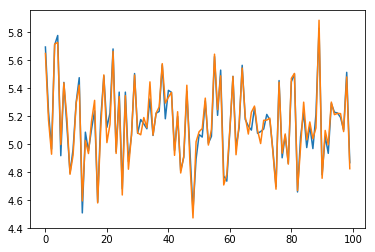

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, ConstantKernel
X, y = make_friedman2(n_samples=500, noise=0, random_state=0)
# kernel = RBF()
kernel = RBF()+DotProduct() + WhiteKernel()
# kernel = RBF() + WhiteKernel()
# kernel = ConstantKernel()+ RBF()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(X_train, Y_train)
gpr.score(X_train, Y_train)

/Users/kojimiyazawa/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:357: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/kojimiyazawa/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:357: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


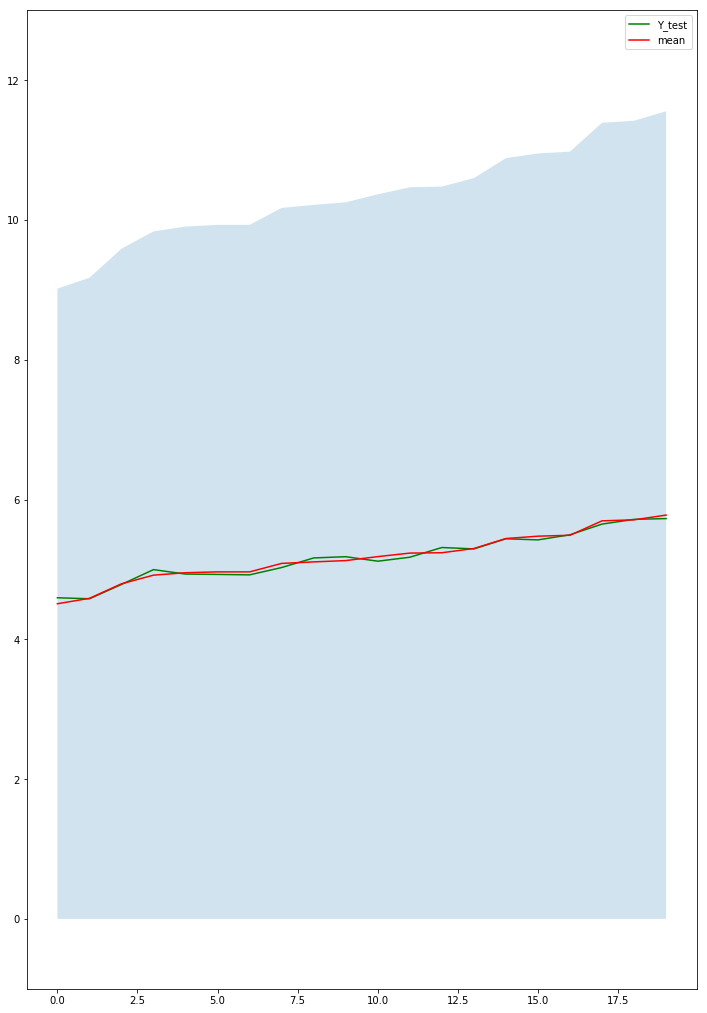

In [136]:
count_row=20
ms=pd.DataFrame({'mean': gpr.predict(X_test[:count_row], return_std=True)[0], 'std':gpr.predict(X_test[:count_row], return_std=True)[0], 'Y_test': Y_test[:count_row]})
ms=ms.sort_values(by='mean')
plt.figure(figsize=[12,18])
plt.plot(range(len(ms)), ms['Y_test'], color="g", label="Y_test")
plt.plot(range(len(Y_test[:count_row])), ms['mean'], color="r", label="mean")
plt.fill_between(range(len(pd.Series(gpr.predict(X_test[:count_row])))), ms['mean'] + ms['std'], ms['mean'] - ms['std'], alpha=0.2)
plt.ylim(-1,13)
plt.legend()
plt.show()


In [137]:
print("二乗誤差: {}".format(np.sum((Y_test-gpr.predict(X_test))**2)))
# 決定係数
R2=np.sum((gpr.predict(X_test)-Y_test.mean())**2) /np.sum((Y_test-Y_test.mean())**2)
print("決定係数: {}".format(R2))
#　自由度調整済み決定係数(説明変数が増えるほど決定係数が上がるという性質を考慮したいため)
a= np.sum((Y_test- gpr.predict(X_test))**2) / (len(Y_test)-len(X_test.columns)-1)
b=np.sum((Y_test- Y_test.mean())**2) / (len(Y_test)-1)
R2_f=1- a/b
print("自由度調節済み決定係数: {}".format(R2_f))

二乗誤差: 2.3940929426028363
決定係数: 0.9684019020889088
自由度調節済み決定係数: 0.9585950042728143


# ランダムフォレストを使った解析

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
print(clf.predict([[0, 0, 0, 0]]))

[1]


/Users/kojimiyazawa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification

clf = RandomForestRegressor(n_estimators = 2, random_state = 42)
clf.fit(X_train.values, Y_train.values)
print("二乗誤差: {}".format(np.sum((Y_test-clf.predict(X_test))**2)))
# 決定係数
R2=np.sum((clf.predict(X_test)-Y_test.mean())**2) /np.sum((Y_test-Y_test.mean())**2)
print("決定係数: {}".format(R2))
#　自由度調整済み決定係数(説明変数が増えるほど決定係数が上がるという性質を考慮したいため)
a= np.sum((Y_test- clf.predict(X_test))**2) / (len(Y_test)-len(X_test.columns)-1)
b=np.sum((Y_test- Y_test.mean())**2) / (len(Y_test)-1)
R2_f=1- a/b
print("自由度調節済み決定係数: {}".format(R2_f))

二乗誤差: 5.33664122717481
決定係数: 0.9520385626598397
自由度調節済み決定係数: 0.9077046662321862


# アンサンブル学習

In [133]:
from sklearn import preprocessing, ensemble, tree
 

reg = ensemble.BaggingRegressor(tree.DecisionTreeRegressor(), n_estimators=100, max_samples=0.3)
y_reg = reg.fit(X_train, Y_train)

print("二乗誤差: {}".format(np.sum((Y_test-y_reg.predict(X_test))**2)))
# 決定係数
R2=np.sum((y_reg.predict(X_test)-Y_test.mean())**2) /np.sum((Y_test-Y_test.mean())**2)
print("決定係数: {}".format(R2))
#　自由度調整済み決定係数(説明変数が増えるほど決定係数が上がるという性質を考慮したいため)
a= np.sum((Y_test- y_reg.predict(X_test))**2) / (len(Y_test)-len(X_test.columns)-1)
b=np.sum((Y_test- Y_test.mean())**2) / (len(Y_test)-1)
R2_f=1- a/b
print("自由度調節済み決定係数: {}".format(R2_f))

二乗誤差: 5.14955686309269
決定係数: 0.8008695716511461
自由度調節済み決定係数: 0.9109402245338709
